In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
!pip install numpy==1.26.4 --force-reinstall

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires jupyter-server==2.14.0, but you have jupyter-server 2.12.5 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which i

# Text Data Annotation Demo: Entity Recognition on IMDb Movie Reviews

This notebook demonstrates text annotation skills using spaCy:
- Cleaning raw reviews
- Extracting named entities (e.g., movie titles as WORK_OF_ART)
- Visualizing results
- Prioritizing reviews for validation
- Analyzing patterns (e.g., sentiment skew in title mentions)

In [3]:
import pandas as pd  
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')  
print(df.head()) 

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


## Step 1: Setup and Installation

In [4]:
!pip install spacy  
!python -m spacy download en_core_web_sm  

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 84.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
ydata-profiling 4.18.0 requires numpy<2.4,>=1.22, but you have numpy 2.4.0 which is incompatible.
google-colab 1.0.0 requires jupyter-server==2.14.0, but you have jupyter-server 2.12.5 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", b

In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")
print("Loaded successfully!")

Loaded successfully!


In [6]:
doc = nlp("Tom Hanks acted in Forrest Gump in Hollywood.")
for ent in doc.ents:
    print(ent.text, ent.label_)
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

Tom Hanks PERSON
Forrest Gump PERSON
Hollywood GPE


## Step 2: Data Cleaning (Remove HTML Tags)

In [7]:
from bs4 import BeautifulSoup
df['clean_review'] = df['review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text(strip=True))

## Step 3: Entity Extraction and Analysis

In [8]:
df_small = df.head(300).copy()  

def extract_entities_detailed(text):
    doc = nlp(text)
    return [(ent.text, ent.label_, spacy.explain(ent.label_), ent.start_char, ent.end_char) for ent in doc.ents]

df_small['entities_detailed'] = df_small['clean_review'].apply(extract_entities_detailed)
df_small['entity_count'] = df_small['entities_detailed'].apply(len)

display(df_small[['clean_review', 'entities_detailed', 'sentiment']].head(10))

,clean_review,entities_detailed,sentiment
0,One of the other reviewers has mentioned that ...,"[(One, CARDINAL, Numerals that do not fall und...",positive
1,A wonderful little production.The filming tech...,"[(BBC, ORG, Companies, agencies, institutions,...",positive
2,I thought this was a wonderful way to spend ti...,"[(summer weekend, DATE, Absolute or relative d...",positive
3,Basically there's a family where a little boy ...,"[(Jake, NORP, Nationalities or religious or po...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is...","[(Love, WORK_OF_ART, Titles of books, songs, e...",positive
5,"Probably my all-time favorite movie, a story o...","[(15, CARDINAL, Numerals that do not fall unde...",positive
6,I sure would like to see a resurrection of a u...,"[(today, DATE, Absolute or relative dates or p...",positive
7,"This show was an amazing, fresh & innovative i...","[(70, DATE, Absolute or relative dates or peri...",negative
8,Encouraged by the positive comments about this...,"[(950+, DATE, Absolute or relative dates or pe...",negative
9,If you like original gut wrenching laughter yo...,"[(Great Camp, FAC, Buildings, airports, highwa...",positive


## Step 4: Entity Visualization (First 10 Reviews)

In [9]:
from spacy import displacy
for i in range(10):
    doc = nlp(df_small['clean_review'].iloc[i])
    displacy.render(doc, style="ent", jupyter=True)

In [10]:
from collections import Counter
all_entities = [ent[0] for ents in df_small['entities_detailed'] for ent in ents]
print(Counter(all_entities).most_common(10))  

df_small['entity_count'] = df_small['entities_detailed'].apply(len)
print(df_small['entity_count'].value_counts())  

[('first', 82), ('one', 81), ('two', 46), ('Hollywood', 25), ('10', 22), ('three', 21), ('One', 20), ('Jimmy', 19), ('English', 15), ('Fulci', 15)]
entity_count
4     24
7     21
8     21
6     18
3     17
9     16
5     15
11    15
10    13
2     13
15    12
13    11
1     10
18     9
17     8
0      8
14     8
24     7
16     6
23     6
19     4
27     4
40     4
12     4
29     3
43     3
34     2
21     2
33     2
31     2
25     2
20     2
37     1
30     1
52     1
50     1
60     1
61     1
41     1
28     1
Name: count, dtype: int64


In [11]:
df_small['has_work_of_art'] = df_small['entities_detailed'].apply(lambda ents: any(e[1] == 'WORK_OF_ART' for e in ents))
print(df_small[df_small['has_work_of_art']][['clean_review', 'sentiment']])

                                          clean_review sentiment
2    I thought this was a wonderful way to spend ti...  positive
4    Petter Mattei's "Love in the Time of Money" is...  positive
12   So im not a big fan of Boll's work but then ag...  negative
13   The cast played Shakespeare.Shakespeare lost.I...  negative
17   This movie made it into one of my top 10 most ...  negative
..                                                 ...       ...
288  Yes, I call this a perfect movie. Not one bori...  positive
290  I saw the movie "Hoot" and then I immediately ...  positive
294  In "Brave New Girl," Holly comes from a small ...  positive
295  Despite a totally misleading advertising campa...  negative
297  I was looking forward to The Guardian, but whe...  positive

[100 rows x 2 columns]


## Quality Checks: Flagging Low-Quality/Ambiguous Reviews

In [12]:
low_entity_reviews = df_small[df_small['entity_count'] < 5]

print(f"Flagged {len(low_entity_reviews)} reviews with fewer than 5 entities:")
display(low_entity_reviews[['clean_review', 'sentiment', 'entity_count']].head(10))

Flagged 72 reviews with fewer than 5 entities:


,clean_review,sentiment,entity_count
6,I sure would like to see a resurrection of a u...,positive,3
9,If you like original gut wrenching laughter yo...,positive,1
10,Phil the Alien is one of those quirky films wh...,negative,2
14,This a fantastic movie of three prisoners who ...,positive,3
19,An awful film! It must have been up against so...,negative,4
21,I had the terrible misfortune of having to vie...,negative,0
22,"What an absolutely stunning movie, if you have...",positive,1
24,This was the worst movie I saw at WorldFest an...,negative,4
27,This film tried to be too many things all at o...,negative,3
28,This movie was so frustrating. Everything seem...,negative,4


## Step 5: Focused Visualization on Title-Mentioning Reviews

In [13]:
selected_indices = [2, 4, 12, 13, 17, 288, 290, 294, 295, 297]  
for idx in selected_indices:
    doc = nlp(df_small['clean_review'].loc[idx])
    displacy.render(doc, style="ent", jupyter=True)
    print(f"Sentiment: {df_small['sentiment'].loc[idx]}\n")

Sentiment: positive



Sentiment: positive



Sentiment: negative



Sentiment: negative



Sentiment: negative



Sentiment: positive



Sentiment: positive



Sentiment: positive



Sentiment: negative



Sentiment: positive



## Step 6: Prioritization and Insights

In [14]:
title_reviews = df_small[df_small['entities_detailed'].apply(lambda ents: any(e[1] == 'WORK_OF_ART' for e in ents))]
print(f"{len(title_reviews)} reviews mention titles—higher validation priority")

100 reviews mention titles—higher validation priority


In [15]:
title_reviews = df_small[df_small['entities_detailed'].apply(lambda ents: any(e[1] == 'WORK_OF_ART' for e in ents))]
print(f"{len(title_reviews)} reviews with titles – prioritize for validation")

print(title_reviews['sentiment'].value_counts(normalize=True))

title_reviews[['clean_review', 'sentiment']].to_csv('title_reviews_for_validation.csv')

100 reviews with titles – prioritize for validation
sentiment
negative    0.54
positive    0.46
Name: proportion, dtype: float64


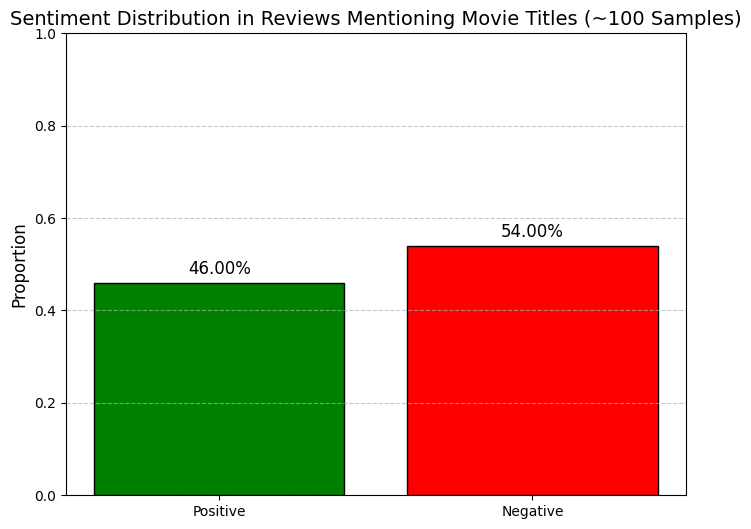

In [16]:
import matplotlib.pyplot as plt

sentiments = {'Positive': 0.46, 'Negative': 0.54}
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiments.keys(), sentiments.values(), color=['green', 'red'], edgecolor='black')

plt.title('Sentiment Distribution in Reviews Mentioning Movie Titles (~100 Samples)', fontsize=14)
plt.ylabel('Proportion', fontsize=12)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

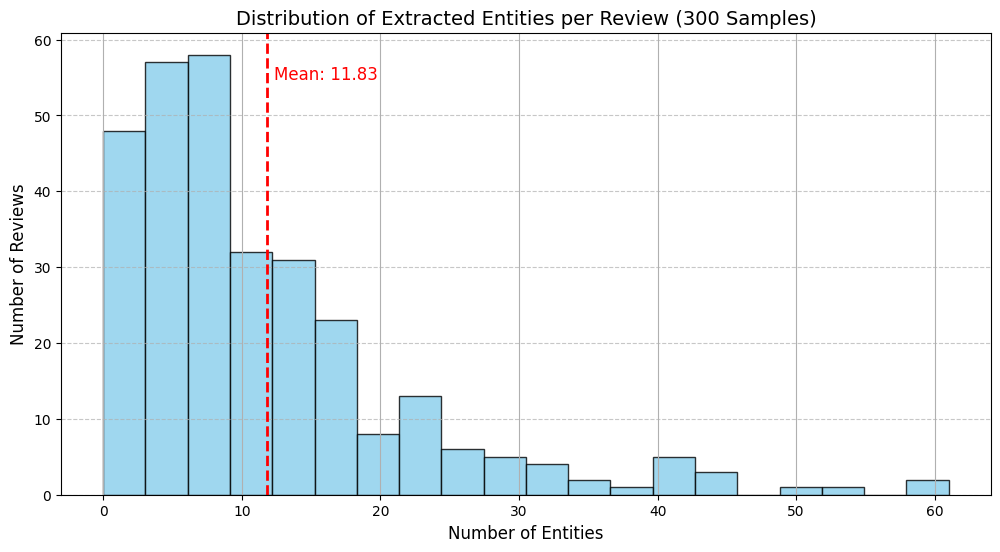

Average: 11.83
Median: 9.0
Zero entities reviews: 8


In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_small['entity_count'].hist(bins=20, edgecolor='black', color='skyblue', alpha=0.8)
plt.title('Distribution of Extracted Entities per Review (300 Samples)', fontsize=14)
plt.xlabel('Number of Entities', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = df_small['entity_count'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_val + 0.5, plt.ylim()[1] * 0.9, f'Mean: {mean_val:.2f}', color='red', fontsize=12)

plt.show()

print(f"Average: {mean_val:.2f}")
print(f"Median: {df_small['entity_count'].median()}")
print(f"Zero entities reviews: {(df_small['entity_count'] == 0).sum()}")

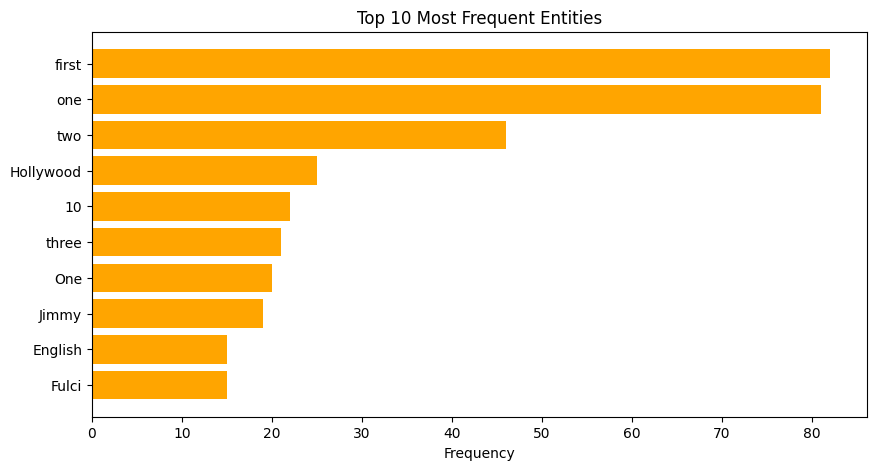

In [18]:
from collections import Counter

all_entities = [ent[0] for ents in df_small['entities_detailed'] for ent in ents]
top_10 = Counter(all_entities).most_common(10)

entities, counts = zip(*top_10)
plt.figure(figsize=(10, 5))
plt.barh([e[:20] + '...' if len(e)>20 else e for e in entities[::-1]], counts[::-1], color='orange')
plt.title('Top 10 Most Frequent Entities')
plt.xlabel('Frequency')
plt.show()

In [20]:
ambiguous_data = df_small[(df_small['entity_count'] < 3) & (df_small['sentiment'] == 'positive')]
ambiguous_data.to_csv('requires_human_expert_review.csv')

print("Task Completed: High-priority samples exported for manual QA.")

Task Completed: High-priority samples exported for manual QA.


In [21]:
def get_annotation_prompt(review_text):
    """
    Generates a high-quality prompt for an LLM to perform Named Entity Recognition (NER)
    and Sentiment Analysis on movie reviews.
    """
    prompt = f"""
    ### Task: Expert Data Annotation
    You are a professional Data Annotator. Your task is to extract entities and sentiment from the movie review provided below.

    ### Instructions:
    1. Extract all 'WORK_OF_ART' (Movie titles, TV shows).
    2. Extract all 'PERSON' (Actors, directors).
    3. Determine the Sentiment (Positive/Negative).
    4. Provide the output in JSON format only.

    ### Review:
    "{review_text}"

    ### Expected Output Format:
    {{
      "entities": [
        {{"text": "Entity Name", "label": "WORK_OF_ART/PERSON"}},
      ],
      "sentiment": "Positive/Negative"
    }}
    """
    return prompt
sample_review = df_small['clean_review'].iloc[2]
print("--- LLM Prompt Template ---")
print(get_annotation_prompt(sample_review))

--- LLM Prompt Template ---

    ### Task: Expert Data Annotation
    You are a professional Data Annotator. Your task is to extract entities and sentiment from the movie review provided below.

    ### Instructions:
    1. Extract all 'WORK_OF_ART' (Movie titles, TV shows).
    2. Extract all 'PERSON' (Actors, directors).
    3. Determine the Sentiment (Positive/Negative).
    4. Provide the output in JSON format only.

    ### Review:
    "I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I'd laughed at one of Woody's comedies in years (dare

In [23]:
comparison_data = {
    "Method": ["spaCy (Small Model)", "LLM (Few-shot Prompting)", "Human (Gold Standard)"],
    "Speed": ["High", "Medium", "Low"],
    "Context Understanding": ["Limited (Statistical)", "High (Semantic)", "Highest"],
    "Consistency": ["100%", "90-95%", "90%"]
}

df_comparison = pd.DataFrame(comparison_data)
display(df_comparison)

,Method,Speed,Context Understanding,Consistency
0,spaCy (Small Model),High,Limited (Statistical),100%
1,LLM (Few-shot Prompting),Medium,High (Semantic),90-95%
2,Human (Gold Standard),Low,Highest,90%
